In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('C:\\Users\Bhushan\Desktop\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 3 - Recurrent Neural Networks (RNN)\Section 10 - Part 3 - RNN\Recurrent_Neural_Networks\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
print(training_set)

[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [10]:
# Creating a data structure with 120 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [13]:

# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [16]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [17]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1138/1138 [==============================] - 25s - loss: 0.0604    
Epoch 2/100
1138/1138 [==============================] - 16s - loss: 0.0083    
Epoch 3/100
1138/1138 [==============================] - 16s - loss: 0.0058    
Epoch 4/100
1138/1138 [==============================] - 16s - loss: 0.0059    
Epoch 5/100
1138/1138 [==============================] - 16s - loss: 0.0048    
Epoch 6/100
1138/1138 [==============================] - 16s - loss: 0.0046    
Epoch 7/100
1138/1138 [==============================] - 16s - loss: 0.0046    
Epoch 8/100
1138/1138 [==============================] - 16s - loss: 0.0048    
Epoch 9/100
1138/1138 [==============================] - 16s - loss: 0.0045    
Epoch 10/100
1138/1138 [==============================] - 16s - loss: 0.0044    
Epoch 11/100
1138/1138 [==============================] - 16s - loss: 0.0046    
Epoch 12/100
1138/1138 [==============================] - 16s - loss: 0.0040    
Epoch 13/100
1138/1138 [=============

In [21]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('C:\\Users\Bhushan\Desktop\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 3 - Recurrent Neural Networks (RNN)\Section 10 - Part 3 - RNN\Recurrent_Neural_Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


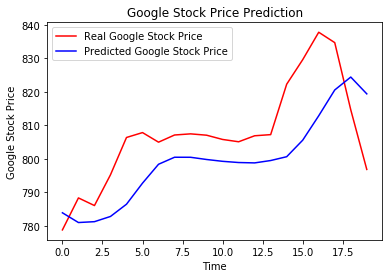

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()